In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

In [2]:
#We have divided our dataset into train and test .I have removed the WIN Column in test so that we can predict . 20 records are kept in train and 10 records are kept in test as we had in total 30 records in main file. 
train=pd.read_csv("basketball_train.csv")
test=pd.read_csv("basketball_test.csv")

In [3]:
#lets check the rows and column in test data 
test.shape

(10, 16)

In [4]:
#lets check the rows and column in train data 
train.shape

(20, 17)

In [16]:
#lets check the top 5 records of test data 
test.head()

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Runs allowed,Earned Runs,Earned Runs Avg,Combo guard,Shoutout,Saves,Errors
0,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
1,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
2,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
3,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
4,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117


In [15]:
#lets check the top 5 records of train data 
train.head()

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Runs allowed,Earned Runs,Earned Runs Avg,Combo guard,Shoutout,Saves,Errors,Wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


In [17]:
#lets observe the count mean and quartile 
#observation 1 : minimum 622 runs is scored everytime 
#oberservation 2 : 698 is the avg run scored 
#minimum 243 doubles is scored everytime 
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Runs,20.0,698.9500,60.446127,622.00,655.750,691.500,725.25,891.00
At Bats,20.0,5524.6500,64.311147,5417.00,5483.000,5510.000,5572.00,5640.00
Hits,20.0,1405.4000,54.746689,1331.00,1376.000,1384.500,1429.75,1515.00
Doubles,20.0,277.4500,17.825101,243.00,269.500,277.500,289.75,308.00
Triples,20.0,30.8000,9.282695,17.00,25.000,29.500,35.25,49.00
HomeRuns,20.0,169.7000,31.659538,136.00,144.000,164.000,181.50,232.00
Walks,20.0,474.4500,53.875563,383.00,435.750,476.500,503.75,570.00
Strikeouts,20.0,1247.1000,115.045940,973.00,1155.500,1257.000,1313.00,1518.00
Stolen Bases,20.0,83.2500,21.843643,44.00,69.000,83.500,95.75,134.00
Runs allowed,20.0,682.1000,65.916135,525.00,640.750,695.500,730.00,803.00


In [19]:
train.shape

(20, 17)

In [20]:
test.shape

(10, 16)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Runs             20 non-null     int64  
 1   At Bats          20 non-null     int64  
 2   Hits             20 non-null     int64  
 3   Doubles          20 non-null     int64  
 4   Triples          20 non-null     int64  
 5   HomeRuns         20 non-null     int64  
 6   Walks            20 non-null     int64  
 7   Strikeouts       20 non-null     int64  
 8   Stolen Bases     20 non-null     int64  
 9   Runs allowed     20 non-null     int64  
 10  Earned Runs      20 non-null     int64  
 11  Earned Runs Avg  20 non-null     float64
 12  Combo guard      20 non-null     int64  
 13  Shoutout         20 non-null     int64  
 14  Saves            20 non-null     int64  
 15  Errors           20 non-null     int64  
 16  Wins             20 non-null     int64  
dtypes: float64(1), int

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Runs             10 non-null     int64  
 1   At Bats          10 non-null     int64  
 2   Hits             10 non-null     int64  
 3   Doubles          10 non-null     int64  
 4   Triples          10 non-null     int64  
 5   HomeRuns         10 non-null     int64  
 6   Walks            10 non-null     int64  
 7   Strikeouts       10 non-null     int64  
 8   Stolen Bases     10 non-null     int64  
 9   Runs allowed     10 non-null     int64  
 10  Earned Runs      10 non-null     int64  
 11  Earned Runs Avg  10 non-null     float64
 12  Combo guard      10 non-null     int64  
 13  Shoutout         10 non-null     int64  
 14  Saves            10 non-null     int64  
 15  Errors           10 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 1.4 KB


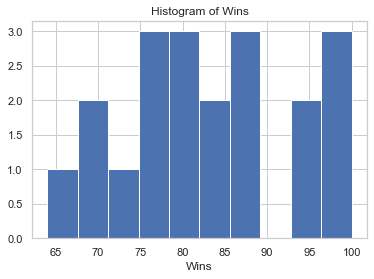

In [26]:
plt.hist(train['Wins'])
plt.xlabel('Wins')
plt.title('Histogram of Wins')
plt.show()

Text(0, 0.5, 'Wins')

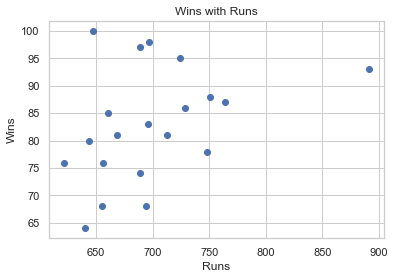

In [31]:
#ScatterPlot Diagram of Wins wrt Runs 
plt.scatter(train['Runs'],train['Wins'])
plt.title('Wins with Runs')
plt.xlabel('Runs')
plt.ylabel('Wins')

Text(0, 0.5, 'Doubles')

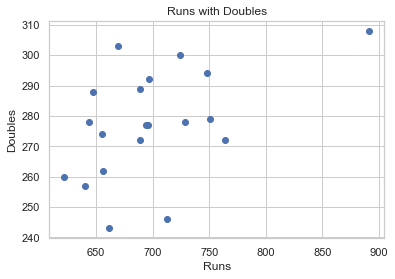

In [32]:
#ScatterPlot Diagram of Runs wrt Doubles   
plt.scatter(train['Runs'],train['Doubles'])
plt.title('Runs with Doubles')
plt.xlabel('Runs')
plt.ylabel('Doubles')

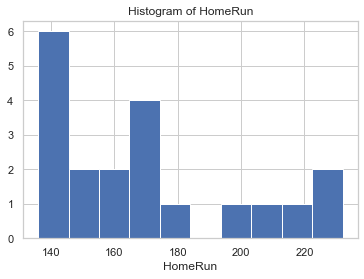

In [35]:
#140 homeruns scored 6 times
plt.hist(train['HomeRuns'])
plt.xlabel('HomeRun')
plt.title('Histogram of HomeRun')
plt.show()

Text(0, 0.5, 'HomeRuns')

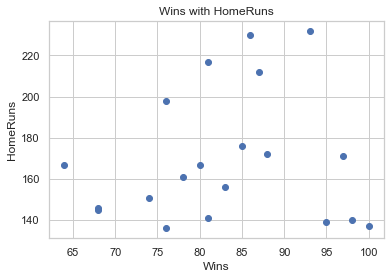

In [36]:
#ScatterPlot Diagram of Wins wrt HomeRuns   
plt.scatter(train['Wins'],train['HomeRuns'])
plt.title('Wins with HomeRuns')
plt.xlabel('Wins')
plt.ylabel('HomeRuns')

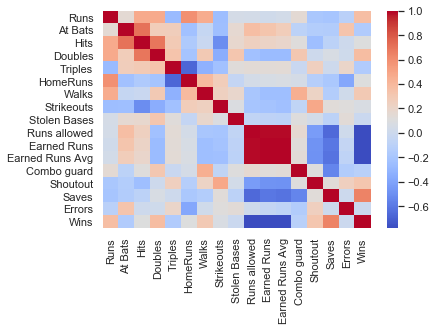

In [47]:
#strong correlation between earned runs , runs allower and earned runs avg
sns.heatmap(train.corr(), cmap='coolwarm')

In [48]:
#Strong Correlation between Saves and Win can be seen of 0.64
train.corr()['Wins']

Runs               0.372940
At Bats           -0.149731
Hits               0.107889
Doubles            0.375276
Triples           -0.151249
HomeRuns           0.103230
Walks              0.298022
Strikeouts         0.078998
Stolen Bases      -0.015464
Runs allowed      -0.777921
Earned Runs       -0.775920
Earned Runs Avg   -0.781226
Combo guard       -0.109884
Shoutout           0.319136
Saves              0.649907
Errors            -0.002414
Wins               1.000000
Name: Wins, dtype: float64

Text(0, 0.5, 'Wins')

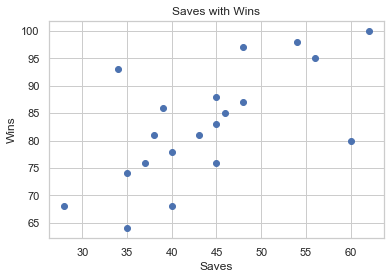

In [51]:
#ScatterPlot Diagram of Saves wrt Wins   
plt.scatter(train['Saves'],train['Wins'])
plt.title('Saves with Wins')
plt.xlabel('Saves')
plt.ylabel('Wins')

In [5]:
target = train["Wins"]
data = train.drop(["Wins"],axis=1)

In [8]:
train.head()

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Runs allowed,Earned Runs,Earned Runs Avg,Combo guard,Shoutout,Saves,Errors,Wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


In [10]:
from sklearn import linear_model

In [ ]:
#data with 30 rec -> train ?
#

In [11]:
regr = linear_model.LinearRegression()
x = np.asanyarray(data)
y = np.asanyarray(target)
regr.fit(x,y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 1.88062387e-01 -3.98228958e-02  6.15850952e-02 -4.32608878e-01
  2.20878969e-01 -1.65410311e-01 -5.40624894e-03  1.56322951e-02
  1.11221539e-02  2.23489609e-03  3.07662834e-01 -6.66032806e+01
  1.17453556e+00 -1.66069531e-01  5.77827430e-01 -7.35335374e-02]


In [12]:
y_hat= regr.predict(test)

In [19]:
df = pd.DataFrame(y_hat,columns=["Wins_Prediction"])

In [22]:
#lets do the prediction of test data
df.head(10)

,Wins_Prediction
0,74.701101
1,87.763708
2,84.537218
3,66.151889
4,54.119431
5,92.395327
6,92.143619
7,88.078354
8,77.303612
9,70.873738
